**Student Information, Name: Mohammed Sohail Ahmed, 
Student Id: 2358074, 

Email Id: moha0748@mylaurie**a
**

# Assignment 1 (Lending Club Dataset)

In [2]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
warnings.filterwarnings("ignore")

In [4]:
loan_data = pd.read_csv("loan_data.csv")

In [5]:
loan_data.shape

(9577, 14)

In [6]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9577 non-null   int64  
 1   purpose            9577 non-null   object 
 2   int.rate           9577 non-null   float64
 3   installment        9577 non-null   float64
 4   log.annual.inc     9577 non-null   float64
 5   dti                9577 non-null   float64
 6   fico               9577 non-null   int64  
 7   days.with.cr.line  9577 non-null   float64
 8   revol.bal          9577 non-null   int64  
 9   revol.util         9577 non-null   float64
 10  inq.last.6mths     9577 non-null   int64  
 11  delinq.2yrs        9577 non-null   int64  
 12  pub.rec            9577 non-null   int64  
 13  not.fully.paid     9577 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# 1. Explore data statistics (6 points).

## (a) Calculate the average FICO credit score for customers who meet (credit.policy = 1) and don’t meet (credit.policy = 0) the credit underwriting criteria.

In [9]:
fico_credit_score_1 = loan_data[loan_data["credit.policy"] == 1]
fico_credit_score_0 = loan_data[loan_data["credit.policy"] == 0]

In [10]:
fico_credit_score_1_mean = fico_credit_score_1["fico"].mean()
fico_credit_score_0_mean = fico_credit_score_0["fico"].mean()

In [11]:
fico_credit_score_1_mean, fico_credit_score_0_mean

(717.3560311284047, 683.952329941082)

## (b) Visualize the distribution of FICO scores for those who have and haven’t fully paid their loans with two separate histograms in a single plot.

In [12]:
fully_paid = loan_data[loan_data["not.fully.paid"] == 0]
not_fully_paid = loan_data[loan_data["not.fully.paid"] == 1]

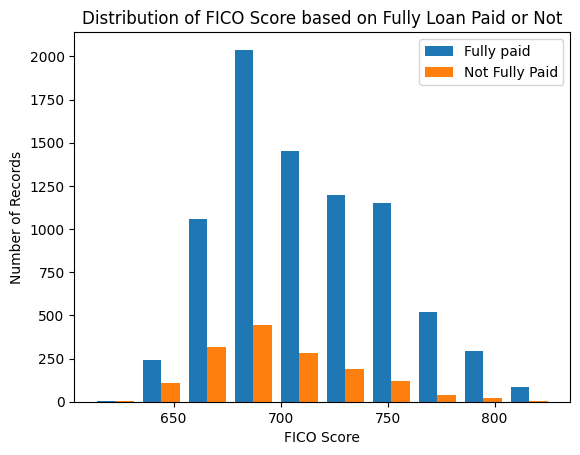

In [13]:
plt.hist([fully_paid["fico"], not_fully_paid["fico"]], label=["Fully paid", "Not Fully Paid"])
plt.xlabel("FICO Score")
plt.ylabel("Number of Records")
plt.title("Distribution of FICO Score based on Fully Loan Paid or Not")
plt.legend()

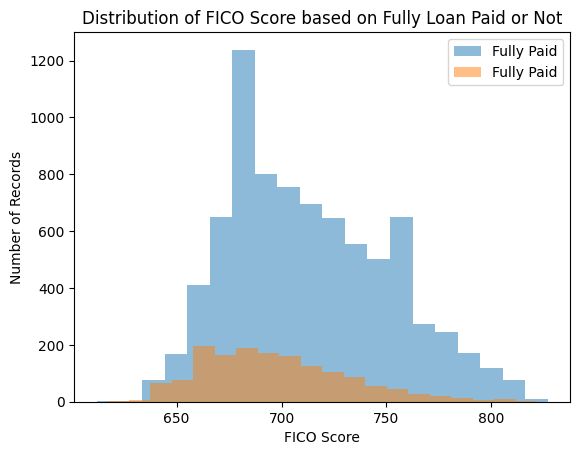

In [14]:
plt.hist(fully_paid["fico"], bins=20, alpha=0.5, label="Fully Paid")
plt.hist(not_fully_paid["fico"], bins=20, alpha=0.5, label="Fully Paid")
plt.xlabel("FICO Score")
plt.ylabel("Number of Records")
plt.title("Distribution of FICO Score based on Fully Loan Paid or Not")
plt.legend()

**Note: The above graphs are save but used with different parameters.**

## (c) Calculate the correlation between interest rate and FICO score and explain what it implies.

In [15]:
loan_data[["int.rate", "fico"]].corr()

,int.rate,fico
int.rate,1.000000,-0.714882
fico,-0.714882,1.000000


In [16]:
loan_data["int.rate"].corr(loan_data["fico"])

-0.7148824438655298

**The correlation between "int.rate" and "fico" column is "-0.714882". There is a strong negative correlation between them. We can say that the customers who have higher fico score tends to have lower interest rate, and vice versa.**

## (d) Visualize the relationship between FICO score and interest rate using a scatter plot and compare it with your conclusion drawn from the last question.

Text(0.5, 1.0, 'Scatter plot between Interest Rate and Fico Score')

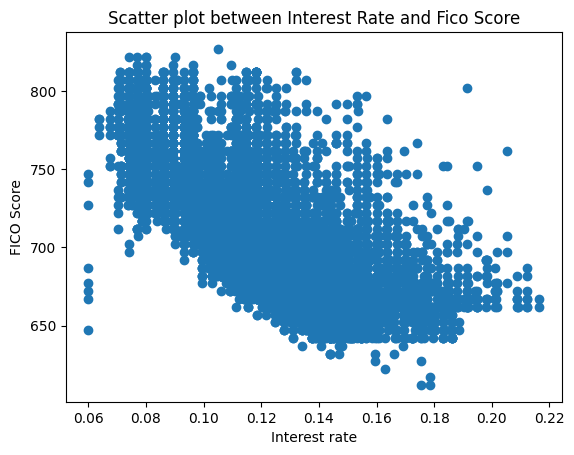

In [17]:
plt.scatter(loan_data["int.rate"], loan_data["fico"])
plt.xlabel("Interest rate")
plt.ylabel("FICO Score")
plt.title("Scatter plot between Interest Rate and Fico Score")

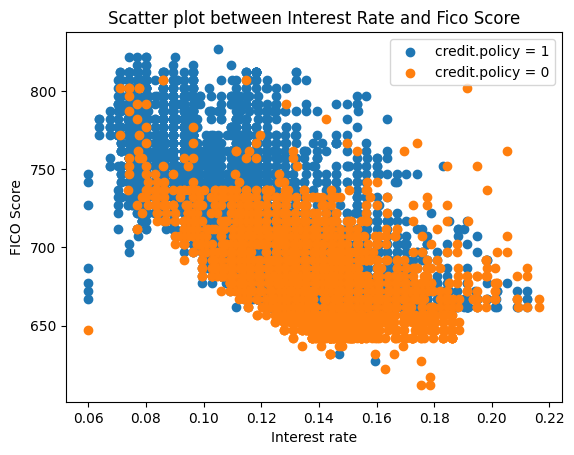

In [18]:
plt.scatter(fico_credit_score_1["int.rate"], fico_credit_score_1["fico"], label="credit.policy = 1")
plt.scatter(fico_credit_score_0["int.rate"], fico_credit_score_0["fico"], label="credit.policy = 0")
plt.xlabel("Interest rate")
plt.ylabel("FICO Score")
plt.title("Scatter plot between Interest Rate and Fico Score")
plt.legend()

**Note: The above scatter plots are same but used with different parameters.**

**The scatter plot also confirms the conclusion of question 1(c). It also shows the downward trend in the relation between interest rate and fico score. Hence, they are negatively correlated.**

## (e) What’s the average interest rate based on the purpose of the loan

In [19]:
loan_data.groupby("purpose")["int.rate"].mean()

purpose
all_other             0.116771
credit_card           0.119738
debt_consolidation    0.126592
educational           0.119907
home_improvement      0.117507
major_purchase        0.114171
small_business        0.138087
Name: int.rate, dtype: float64

## (f) Is there a significant difference in the distribution of FICO scores between customers who fully paid their loans and those who didn’t? (Hint: Visualize using a boxplot)

Text(0.5, 1.0, 'Distribution of FICO Scores by Loan Status i.e: (Fully Paid or Not Fully Paid) and (Fico Score)')

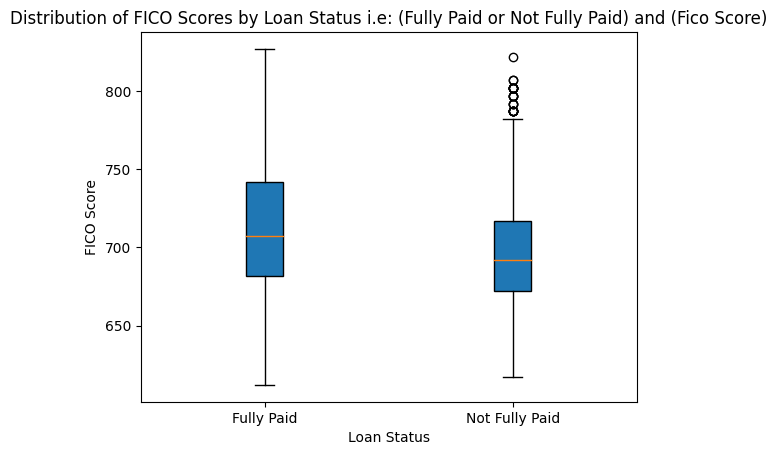

In [20]:
plt.boxplot([fully_paid["fico"], not_fully_paid["fico"]], labels=["Fully Paid", "Not Fully Paid"], patch_artist=True)
plt.xlabel("Loan Status")
plt.ylabel("FICO Score")
plt.title("Distribution of FICO Scores by Loan Status i.e: (Fully Paid or Not Fully Paid) and (Fico Score)")

**There is a slightly difference between the customers who Fully Paid their loan and who didn't.**

# 2. Prepare the dataset for model training (4 points).

## 1) convert categorical variables (e.g., purpose) into dummy variables;

In [21]:
loan_data_with_dummies = loan_data.join(pd.get_dummies(loan_data["purpose"], prefix="purpose", drop_first=True))

In [22]:
loan_data_with_dummies.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## 2) drop the category reference;

In [23]:
loan_data_with_dummies.drop("purpose", axis=1, inplace=True)

In [24]:
loan_data_with_dummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## 3) show the first 5 rows after preprocessing;

In [25]:
loan_data_with_dummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## 4) Split the data into training and test sets (70% training, 30% test), and show the sizes of training and testing data.

In [26]:
X = loan_data_with_dummies[["credit.policy", "int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util", "inq.last.6mths", "delinq.2yrs", "pub.rec", "purpose_credit_card", "purpose_debt_consolidation", "purpose_educational", "purpose_home_improvement", "purpose_major_purchase", "purpose_small_business"]]
y = loan_data_with_dummies["not.fully.paid"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.shape

(6703, 18)

In [29]:
X_test.shape

(2874, 18)

In [30]:
y_train.shape

(6703,)

In [31]:
y_test.shape

(2874,)

# 3. Construct a decision tree (4 points).

## 1) Train a decision tree classification model using the Gini criterion and show its accuracy.

In [32]:
decision_tree_classifier_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

In [33]:
decision_tree_classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred_gini = decision_tree_classifier_gini.predict(X_test)

In [35]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)

In [36]:
accuracy_gini

0.7404314544189283

**The accuracy of the "Decision Tree Classifier" using "Gini" criterion is "0.7404314544189283" which is 74%."**

## 2) Train a decision tree classification model using the Entropy criterion and show its accuracy.

In [37]:
decision_tree_classifier_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

In [38]:
decision_tree_classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
y_pred_enrtopy = decision_tree_classifier_entropy.predict(X_test)

In [40]:
accuracy_entropy = accuracy_score(y_test, y_pred_enrtopy)

In [41]:
accuracy_entropy

0.7446068197633959

**The accuracy of the "Decision Tree Classifier" using "Entropy" criterion is "0.7446068197633959" which is over "74%."**

## 3) Which decision tree model (Gini or Entropy) performs better on the test set?

In [42]:
if accuracy_gini > accuracy_entropy:
    print("""The "Decision Tree Classifier" using "Gini" criterion is better than "Decision Tree Classifier" using "Entropy" criterion.""")
elif accuracy_entropy > accuracy_gini:
    print("""The "Decision Tree Classifier" using "Entropy" criterion is better than "Decision Tree Classifier" using "Gini" criterion.""")
else:
    print("""The "Decision Tree Classifier" using "Entropy" criterion and using "Gini" criterion are same.""")

The "Decision Tree Classifier" using "Entropy" criterion is better than "Decision Tree Classifier" using "Gini" criterion.


# 4. Build a KNN (3 points).

## 1) Train a K-Nearest Neighbors (KNN) classifier with k = 5 and show its accuracy.

In [43]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred_knn_5 = knn_5.predict(X_test.values)

In [46]:
accuracy_knn_5 = accuracy_score(y_test, y_pred_knn_5)

In [47]:
accuracy_knn_5

0.8180236604036186

**The accuracy of "KNeighboursClassifier" with "k = 5" is "0.8180236604036186" which is over "81%".**

## 2) Train a K-Nearest Neighbors (KNN) classifier with k = 3 and show its accuracy.

In [48]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [49]:
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred_knn_3 = knn_3.predict(X_test.values)

In [51]:
accuracy_knn_3 = accuracy_score(y_test, y_pred_knn_3)

In [52]:
accuracy_knn_3

0.7957550452331246

**The accuracy of "KNeighboursClassifier" with "k = 3" is "0.7957550452331246" which is over "79".**

## 3) Which K-Nearest Neighbors model (k = 3 or k = 5) performs better on the test set?

In [53]:
if accuracy_knn_5 > accuracy_knn_3:
    print("""The "KNeighboursClassifier" with "k = 5" performs better than "KNeighboursClassifier" with "k = 3".""")
elif accuracy_knn_3 > accuracy_knn_5:
    print("""The "KNeighboursClassifier" with "k = 3" performs better than "KNeighboursClassifier" with "k = 5".""")
else:
    print("""The "KNeighboursClassifier" with "k = 5" and "KNeighboursClassifier" with "k = 3" are equal.""")

The "KNeighboursClassifier" with "k = 5" performs better than "KNeighboursClassifier" with "k = 3".


# 5. Perform evaluation (3 points).

## 1) Evaluate the performance of the decision tree (using Entropy) and KNN (k = 5) models using the F1-score.

In [54]:
f1_score(y_test, y_pred_enrtopy)

0.22736842105263158

**The "F1 Score" of "Decision Tree Classifier" with "Entropy" as crition is "0.22736842105263158".**

In [55]:
f1_score(y_test, y_pred_knn_5)

0.06440071556350625

**The "F1 Score" of "K Nearest Neighbours" with "k = 5" as crition is "0.06440071556350625".**

## 2) Calculate the precision and recall for the decision tree (using Entropy) model.

In [56]:
precision_score(y_test, y_pred_enrtopy)

0.21686746987951808

**The "Precision Score" of "Decision Tree Classifier" with "Entropy" as crition is "0.21686746987951808".**

In [57]:
recall_score(y_test, y_pred_enrtopy)

0.23893805309734514

**The "Recall Score" of "Decision Tree Classifier" with "Entropy" as crition is "0.23893805309734514".**

## 3) Calculate the ROC-AUC score for both the decision tree (using Entropy) and KNN (k = 5) models.

In [58]:
roc_auc_score(y_test, y_pred_enrtopy)

0.5389570529731151

**The "ROC-AUC Score" of "Decision Tree Classifier" with "Entropy" as crition is "0.5389570529731151".**

In [59]:
roc_auc_score(y_test, y_pred_knn_5)

0.5015382591729207

**The "ROC-AUC Score" of "K Nearest Neighbours" with "k = 5" as crition is "0.5015382591729207".**